In [1]:
# Step 1: Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Random seed for reproducibility
np.random.seed(42)


In [2]:
# Step 2: Define dataset structure

companies = ["Foot Locker", "JD Sports"]

regions = [
    "North America",
    "Europe",
    "Asia Pacific",
    "UK"
]

age_groups = [
    "Under 18",
    "18-24",
    "25-34",
    "35-44",
    "45-54",
    "55+"
]

genders = ["Male", "Female"]
income_levels = ["Low", "Medium", "High"]

# Number of records
n = 500


In [3]:
# Step 3: Generate synthetic retail dataset

data = {
    "Company": np.random.choice(companies, n),

    "Region": np.random.choice(regions, n),

    "Age_Group": np.random.choice(age_groups, n),

    "Gender": np.random.choice(genders, n),

    "Income_Level": np.random.choice(income_levels, n),

    "Units_Sold": np.random.randint(10, 500, n),

    "Revenue_per_Unit": np.random.uniform(50, 200, n),

    "Profit_Margin_Percent": np.random.uniform(3, 12, n)
}

df = pd.DataFrame(data)

df.head()


,Company,Region,Age_Group,Gender,Income_Level,Units_Sold,Revenue_per_Unit,Profit_Margin_Percent
0,Foot Locker,Asia Pacific,55+,Male,High,29,62.137892,5.513485
1,JD Sports,North America,Under 18,Female,Medium,291,110.447027,8.785937
2,Foot Locker,North America,Under 18,Male,Low,294,76.028677,9.247355
3,Foot Locker,UK,Under 18,Male,Low,10,154.242663,7.613893
4,Foot Locker,Asia Pacific,45-54,Female,Low,128,101.914959,5.747796


In [4]:
# Step 4: Calculate Revenue and Profit

df["Total_Revenue"] = df["Units_Sold"] * df["Revenue_per_Unit"]

df["Profit"] = df["Total_Revenue"] * (df["Profit_Margin_Percent"] / 100)

df.head()


,Company,Region,Age_Group,Gender,Income_Level,Units_Sold,Revenue_per_Unit,Profit_Margin_Percent,Total_Revenue,Profit
0,Foot Locker,Asia Pacific,55+,Male,High,29,62.137892,5.513485,1801.998881,99.352934
1,JD Sports,North America,Under 18,Female,Medium,291,110.447027,8.785937,32140.084803,2823.807664
2,Foot Locker,North America,Under 18,Male,Low,294,76.028677,9.247355,22352.431111,2067.008692
3,Foot Locker,UK,Under 18,Male,Low,10,154.242663,7.613893,1542.426633,117.438710
4,Foot Locker,Asia Pacific,45-54,Female,Low,128,101.914959,5.747796,13045.114750,749.806596


In [5]:
# Step 5: Save dataset

df.to_csv("footlocker_jdsports_dataset.csv", index=False)

print("Dataset saved successfully.")


Dataset saved successfully.


In [6]:
# Step 6: Dataset summary

df.describe()


,Units_Sold,Revenue_per_Unit,Profit_Margin_Percent,Total_Revenue,Profit
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,257.074000,124.808627,7.472948,32162.081621,2396.443434
std,141.947422,43.351681,2.578915,22251.597526,1958.791377
min,10.000000,50.482740,3.001212,941.014631,47.866820
25%,139.000000,86.073209,5.504461,14326.173643,940.460608
50%,261.500000,125.829460,7.443123,26545.410182,1852.347828
75%,373.250000,162.843770,9.660424,47958.021165,3045.567767
max,499.000000,199.752127,11.980388,94076.280519,10182.335523


Company
Foot Locker    7.991602e+06
JD Sports      8.089439e+06
Name: Total_Revenue, dtype: float64


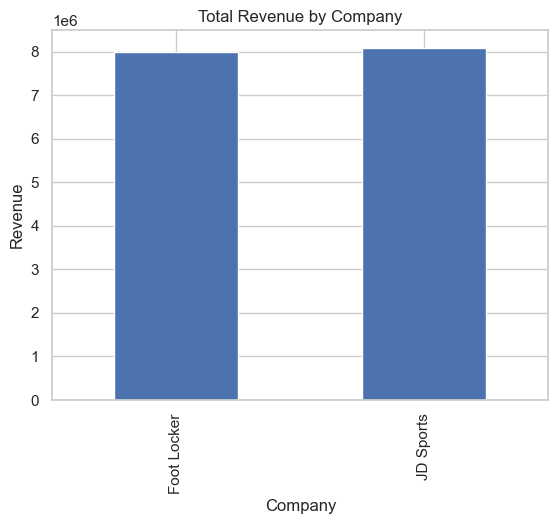

In [7]:
# Step 7: Total revenue by company

company_sales = df.groupby("Company")["Total_Revenue"].sum()

print(company_sales)

company_sales.plot(kind="bar")

plt.title("Total Revenue by Company")
plt.ylabel("Revenue")
plt.show()


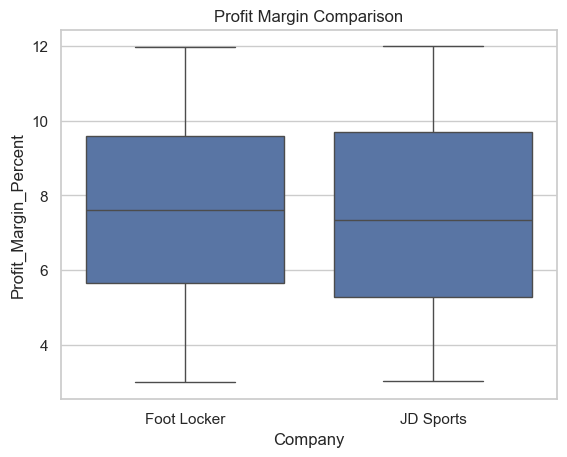

In [8]:
# Step 8: Profit margin comparison

sns.boxplot(x="Company", y="Profit_Margin_Percent", data=df)

plt.title("Profit Margin Comparison")
plt.show()


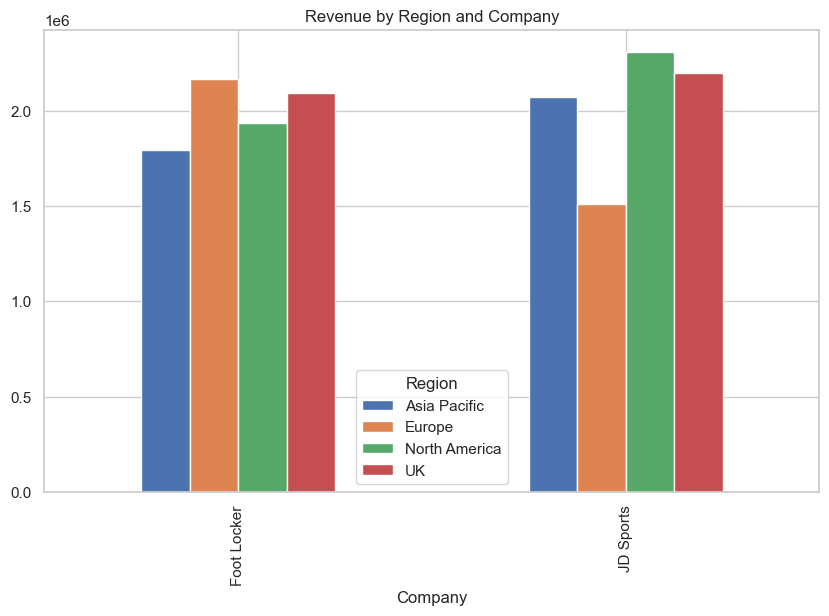

In [9]:
# Step 9: Regional sales

region_sales = df.groupby(["Company", "Region"])["Total_Revenue"].sum().unstack()

region_sales.plot(kind="bar", figsize=(10,6))

plt.title("Revenue by Region and Company")
plt.show()


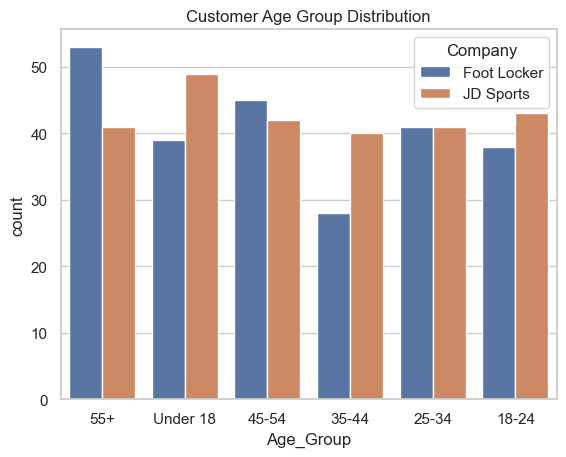

In [10]:
# Step 10: Age group distribution

sns.countplot(x="Age_Group", hue="Company", data=df)

plt.title("Customer Age Group Distribution")
plt.show()


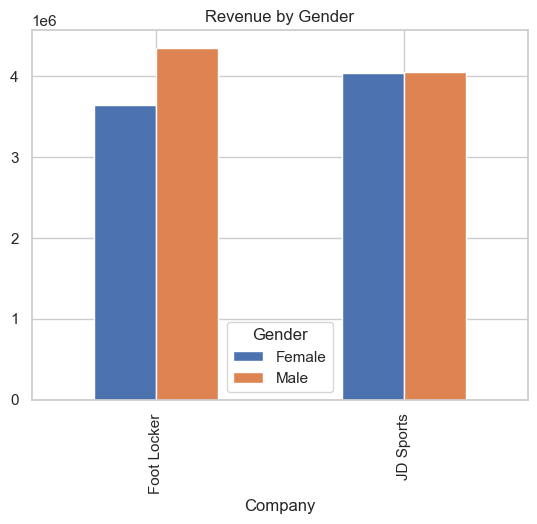

In [11]:
# Step 11: Gender revenue

gender_sales = df.groupby(["Company", "Gender"])["Total_Revenue"].sum().unstack()

gender_sales.plot(kind="bar")

plt.title("Revenue by Gender")
plt.show()


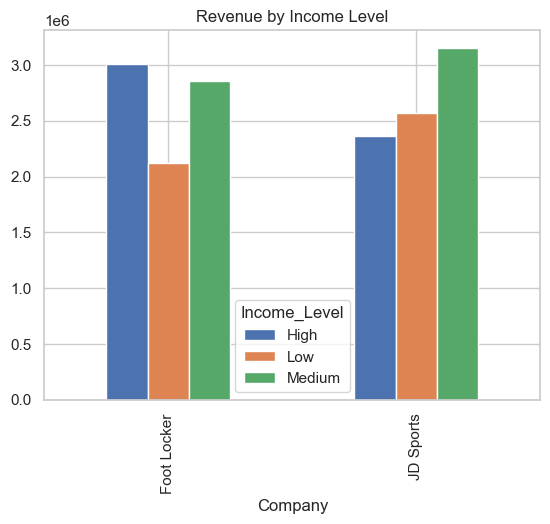

In [12]:
# Step 12: Income level revenue

income_sales = df.groupby(["Company", "Income_Level"])["Total_Revenue"].sum().unstack()

income_sales.plot(kind="bar")

plt.title("Revenue by Income Level")
plt.show()


In [13]:
# Step 13: Best region

best_region = df.groupby("Region")["Total_Revenue"].sum()

print(best_region.sort_values(ascending=False))


Region
UK               4.294642e+06
North America    4.244236e+06
Asia Pacific     3.863765e+06
Europe           3.678397e+06
Name: Total_Revenue, dtype: float64


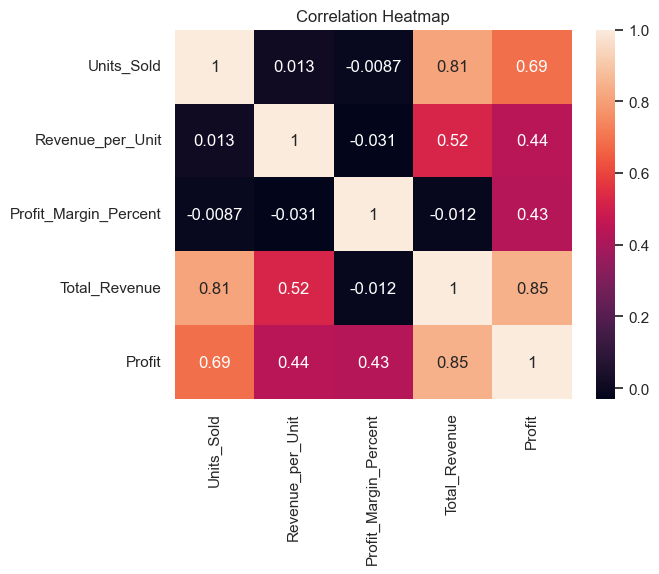

In [14]:
# Step 14: Correlation analysis

corr = df[[
    "Units_Sold",
    "Revenue_per_Unit",
    "Profit_Margin_Percent",
    "Total_Revenue",
    "Profit"
]].corr()

sns.heatmap(corr, annot=True)

plt.title("Correlation Heatmap")
plt.show()


In [15]:
df.head(20)


,Company,Region,Age_Group,Gender,Income_Level,Units_Sold,Revenue_per_Unit,Profit_Margin_Percent,Total_Revenue,Profit
0,Foot Locker,Asia Pacific,55+,Male,High,29,62.137892,5.513485,1801.998881,99.352934
1,JD Sports,North America,Under 18,Female,Medium,291,110.447027,8.785937,32140.084803,2823.807664
2,Foot Locker,North America,Under 18,Male,Low,294,76.028677,9.247355,22352.431111,2067.008692
3,Foot Locker,UK,Under 18,Male,Low,10,154.242663,7.613893,1542.426633,117.438710
4,Foot Locker,Asia Pacific,45-54,Female,Low,128,101.914959,5.747796,13045.114750,749.806596
5,JD Sports,North America,35-44,Male,High,44,196.341530,4.913799,8639.027326,424.504472
6,Foot Locker,UK,45-54,Male,Medium,207,146.145812,3.298704,30252.183002,997.930029
7,Foot Locker,Asia Pacific,35-44,Female,High,494,173.372085,5.735518,85645.809765,4912.230502
8,Foot Locker,UK,45-54,Male,High,254,69.878701,8.878465,17749.190031,1575.855645
9,JD Sports,Europe,45-54,Male,Medium,68,179.302172,11.444743,12192.547719,1395.405796
